# Dataset Creation

This code relies on data from a [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv) that provides realestate data. We will extract the data for sale price vs floor area.

Ensure that conda environment selected for kernel

In [1]:
# going to use Pandas for easy handling of CSV files
import pandas as pd


In [2]:
# downloaded data from: 
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv
df = pd.read_csv('realestate_data.csv')
# print the columns
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
print(f'Original Data Shape: rows,cols : {df.shape}')

Original Data Shape: rows,cols : (1460, 81)


In [4]:
# want to select houses in reasonable condition
#   Trims the rows for which condition is true
df2 = df[df['OverallCond'] > 5] # clean up data a bit.
print(f'First trimming shape: rows,cols : {df2.shape}')

First trimming shape: rows,cols : (551, 81)


In [5]:
# only keeping the 'SalePrice' and 'GrLivArea' (above ground living area) columns
slim_df = df2[['SalePrice','GrLivArea']]
print(f'Second trimming shape: rows,cols : {slim_df.shape}')

Second trimming shape: rows,cols : (551, 2)


In [6]:
# save this data as a new CSV file
slim_df.to_csv('slimmed_realestate_data.csv')

In [7]:
print(f"{pd.get_option('plotting.backend')}")

matplotlib


<AxesSubplot:xlabel='SalePrice'>

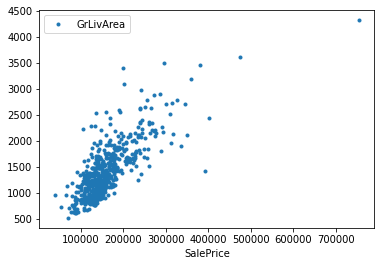

In [8]:
# see a quick plot to verify this can be fit with linear regression.
slim_df.plot(x='SalePrice',y='GrLivArea',style='.')